In [1]:
!pip install xee
import matplotlib.pyplot as plt
import ee
import geemap
import xarray as xr
import xee
import numpy as np
import pandas as pd
ee.Authenticate()
ee.Initialize(project = 'air-quality-466614', opt_url = 'https://earthengine-highvolume.googleapis.com')
gaul = (ee.FeatureCollection("FAO/GAUL/2015/level2")
        .filter(ee.Filter.eq('ADM0_NAME', 'Sri Lanka')))

roi = gaul.geometry()


In [2]:
monthly_data = ee.ImageCollection("projects/sat-io/open-datasets/GHAP/GHAP_M1K_PM25").filterDate('2017','2023')
monthly_dataset = xr.open_dataset(
    monthly_data,
    engine='ee',
    crs='EPSG:4326',
    geometry=roi,
    scale=0.001
)

In [3]:
monthly_mean=monthly_dataset.groupby('time.month').mean('time')

In [4]:
monthly_mean_scaled = monthly_mean * 0.1

In [5]:
# Convert scaled monthly mean to dataframe
df = monthly_mean_scaled.to_dataframe().reset_index()

# Assuming your data variable is named 'b1'
# Drop NaN values to avoid errors
df = df[['month', 'b1']].dropna()

<Figure size 1000x600 with 0 Axes>

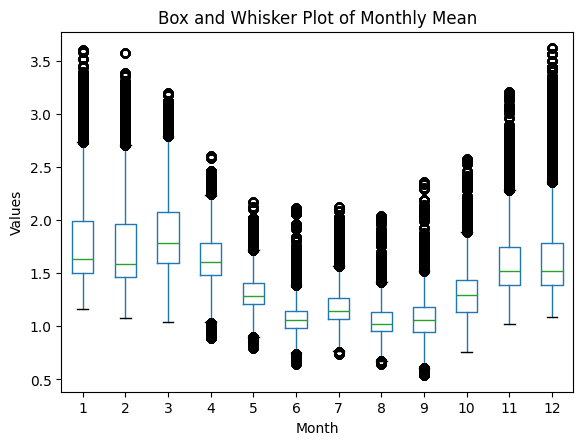

In [6]:
# Create boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='b1', by='month', grid=False)

plt.title("Box and Whisker Plot of Monthly Mean")
plt.suptitle("")  # remove default title
plt.xlabel("Month")
plt.ylabel("Values")
plt.show()

<Figure size 1000x600 with 0 Axes>

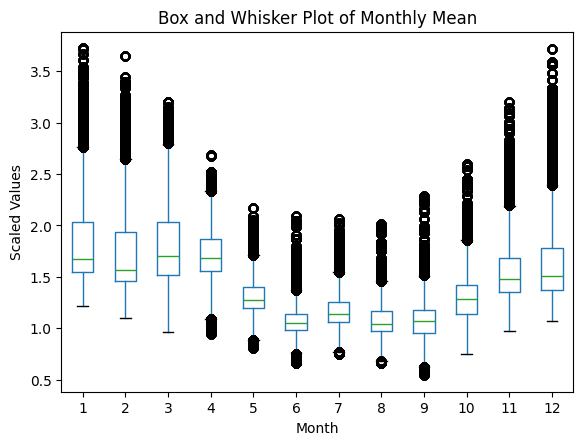

In [ ]:
# Create boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='b1', by='month', grid=False)

plt.title("Box and Whisker Plot of Monthly Mean")
plt.suptitle("")  # remove default title
plt.xlabel("Month")
plt.ylabel("Scaled Values")
plt.show()